In [42]:
import math

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")
plt.style.use("seaborn-ticks")

In [63]:
def autocorr(data, tmax):
    lags = np.arange(tmax)
    ac_series = np.zeros(tmax)
    for i, t in enumerate(lags):
        if t == 0:
            ac_series[i] = np.var(data)
        else:
            T = data.size - t
            corr = np.sum(data[:-t] * data[t:]) / T
            mean_sq = np.sum(data[:-t]) * np.sum(data[t:]) / T ** 2
            ac_series[i] = corr - mean_sq
    ac_series /= np.var(data)
    return ac_series


def negexp(x, a, b):
    return a * np.exp(-b * x)

def block_error(data, block, n_blocks):
    if n_blocks == 0:
        return 0
    else:
        ave = np.zeros(n_blocks)
        av2 = np.zeros(n_blocks)
        for i in range(n_blocks):
            k = i * block
            sum = np.sum(data[k : k + block])
        ave[i] = sum / block
        av2[i] = (ave[i]) ** 2
        sum = np.sum(ave) / n_blocks
        sum_2 = np.sum(av2) / n_blocks
        return math.sqrt((sum_2 - sum ** 2) / (n_blocks-1))

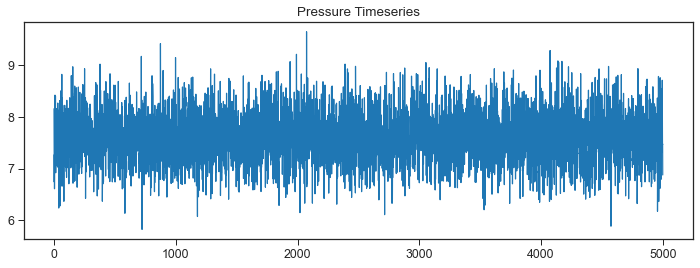

In [68]:
P = np.loadtxt("./data/timeseries/output.pressure")
skip = 100
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.lineplot(data=P[::skip])
ax.title.set_text("Pressure Timeseries")
plt.show()

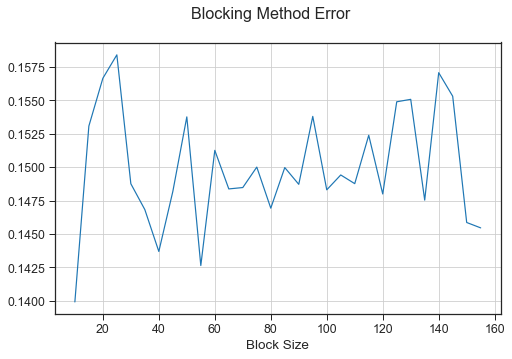

In [77]:
M = 500000 # total number of data points
n = 100
cutoff = 30
# block_sizes = np.linspace(10, 5000, n, endpoint=True, dtype=int)
block_sizes = np.arange(10, 5000, 5)
errors = np.zeros(block_sizes.size)

for i, L in enumerate(block_sizes):
    errors[i] = block_error(P, L, 50)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
fig.suptitle("Blocking Method Error")
sns.lineplot(x=block_sizes[:cutoff], y=errors[:cutoff], ax=ax)
ax.set(xlabel="Block Size")
plt.grid()

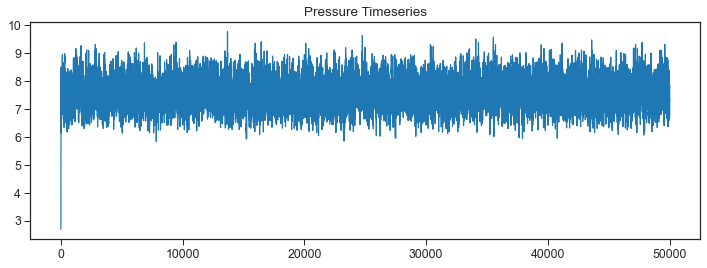

In [67]:
P = np.loadtxt("./output.pressure")
skip = 1
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.lineplot(data=P[::skip])
ax.title.set_text("Pressure Timeseries")
plt.show()